In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../input/train.csv',index_col=0)

In [3]:
train.shape

(4209, 377)

In [11]:
import scipy.stats as stats

def QQPlot(measurements):
    stats.probplot(measurements, dist="norm", plot=pylab)
    print stats.normaltest(measurements)
    pylab.show()


In [12]:
QQPlot(np.log(train.y))

NormaltestResult(statistic=218.39442716048086, pvalue=3.7692305537237642e-48)


NormaltestResult(statistic=1302.0131961998502, pvalue=1.8682146036517085e-283)


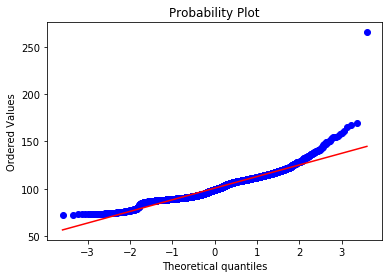

In [17]:
QQPlot( (train.y))

In [4]:
train['y'].hist(bins=40);

In [107]:
catcols=[ u'X0', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X8']
boolcols=[u for u in train.columns if u.startswith('X') and u not in catcols]
len(catcols),len(boolcols)

(8, 368)

In [108]:
boolcols=train[boolcols].columns[train[boolcols].sum(0)>0] 
len(boolcols)

356

In [121]:
train[gthalfcols].mean() 

X27     0.682585
X46     0.597292
X51     0.721787
X58     0.574958
X61     0.953908
X70     0.919933
X74     0.999287
X80     0.947018
X96     0.758137
X98     0.942504
X100    0.690188
X101    0.935614
X103    0.784509
X111    0.974816
X118    0.622238
X119    0.622238
X120    0.957710
X128    0.958422
X132    0.688525
X136    0.956522
X137    0.581848
X142    0.770254
X144    0.808030
X150    0.792350
X156    0.717273
X171    0.657401
X178    0.557377
X186    0.535994
X189    0.915419
X205    0.999762
X209    0.898551
X220    0.561178
X223    0.555239
X229    0.960086
X238    0.916132
X250    0.552863
X263    0.956997
X265    0.905441
X273    0.720124
X275    0.726776
X304    0.924210
X311    0.598479
X324    0.574958
X337    0.516512
X348    0.947256
X361    0.966025
X362    0.520314
X363    0.753861
dtype: float64

In [118]:
gthalfcols= train[boolcols].columns[train[boolcols].mean()>0.5]

In [123]:
catmap={}
for c in catcols:
    uset=list(set(train[c]))
    print c, uset
    catmap[c]=uset

X0 ['aa', 'ac', 'ab', 'ad', 'af', 'ai', 'ak', 'aj', 'am', 'al', 'ao', 'aq', 'ap', 'as', 'au', 'at', 'aw', 'ay', 'ax', 'az', 'ba', 'bc', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z']
X1 ['aa', 'ab', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'z']
X2 ['aa', 'ac', 'ae', 'ag', 'af', 'ai', 'ah', 'ak', 'am', 'al', 'ao', 'an', 'aq', 'ap', 'as', 'ar', 'au', 'at', 'aw', 'av', 'ay', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 't', 'y', 'x', 'z']
X3 ['a', 'c', 'b', 'e', 'd', 'g', 'f']
X4 ['a', 'c', 'b', 'd']
X5 ['aa', 'ac', 'ab', 'ae', 'ad', 'ag', 'af', 'ah', 'c', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 'w', 'v', 'y', 'x']
X6 ['a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'l']
X8 ['a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 

In [126]:
def transform(df,with_y=True):
    if with_y: dfy=df[['y']]
    dfbool=df[boolcols]
    dfbool.loc[:,gthalfcols]=1-dfbool[gthalfcols]
    dfcats=[]
    for c in catcols:
        dfc=[]
        for v in catmap[c]:
            dfc.append((df[c]==v)*1)
        dfc=pd.DataFrame(dfc).T
        dfc.columns=[c+"_"+x for x in catmap[c]]
        print dfc.shape
        dfcats.append(dfc)
    dfcats=pd.concat(dfcats,axis=1)
    print dfcats.shape
    if with_y:
        return pd.concat([dfy,dfcats,dfbool],axis=1)
    else:
        return pd.concat([dfcats,dfbool],axis=1)

    

In [127]:
newtrain=transform(train)

/home/bo/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4209, 47)
(4209, 27)
(4209, 44)
(4209, 7)
(4209, 4)
(4209, 29)
(4209, 12)
(4209, 25)
(4209, 195)


In [134]:
 newtrain.mean().sort_values()

X2_ar      0.000238
X257       0.000238
X2_j       0.000238
X0_g       0.000238
X2_aa      0.000238
X5_y       0.000238
X210       0.000238
X207       0.000238
X205       0.000238
X204       0.000238
X259       0.000238
X190       0.000238
X2_o       0.000238
X4_c       0.000238
X95        0.000238
X4_b       0.000238
X5_g       0.000238
X5_h       0.000238
X42        0.000238
X39        0.000238
X33        0.000238
X2_l       0.000238
X260       0.000238
X5_u       0.000238
X288       0.000238
X2_af      0.000238
X339       0.000238
X270       0.000238
X2_am      0.000238
X0_ac      0.000238
            ...    
X355       0.380375
X2_as      0.394155
X251       0.394155
X311       0.401521
X46        0.402708
X85        0.408173
X246       0.409361
X137       0.418152
X261       0.419577
X187       0.420527
X324       0.425042
X58        0.425042
X358       0.426942
X14        0.428130
X314       0.431694
X329       0.435258
X220       0.438822
X178       0.442623
X223       0.444761


In [135]:
newtrain.to_csv('../input/newtrain.csv')
newtrain.shape

(4209, 552)

In [136]:
test = pd.read_csv('../input/test.csv',index_col=0)

In [137]:
newtest=transform(test,False)
newtest.shape

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4209, 47)
(4209, 27)
(4209, 44)
(4209, 7)
(4209, 4)
(4209, 29)
(4209, 12)
(4209, 25)
(4209, 195)


(4209, 551)

In [138]:
 newtrain.mean().sort_values()

X2_ar      0.000238
X257       0.000238
X2_j       0.000238
X0_g       0.000238
X2_aa      0.000238
X5_y       0.000238
X210       0.000238
X207       0.000238
X205       0.000238
X204       0.000238
X259       0.000238
X190       0.000238
X2_o       0.000238
X4_c       0.000238
X95        0.000238
X4_b       0.000238
X5_g       0.000238
X5_h       0.000238
X42        0.000238
X39        0.000238
X33        0.000238
X2_l       0.000238
X260       0.000238
X5_u       0.000238
X288       0.000238
X2_af      0.000238
X339       0.000238
X270       0.000238
X2_am      0.000238
X0_ac      0.000238
            ...    
X355       0.380375
X2_as      0.394155
X251       0.394155
X311       0.401521
X46        0.402708
X85        0.408173
X246       0.409361
X137       0.418152
X261       0.419577
X187       0.420527
X324       0.425042
X58        0.425042
X358       0.426942
X14        0.428130
X314       0.431694
X329       0.435258
X220       0.438822
X178       0.442623
X223       0.444761


In [139]:
newtest.to_csv('../input/newtest.csv')


In [140]:
newtest.head()

X0_aa  X0_ac  X0_ab  X0_ad  X0_af  X0_ai  X0_ak  X0_aj  X0_am  X0_al  \
ID                                                                         
1       0      0      0      0      0      0      0      0      0      0   
2       0      0      0      0      0      0      0      0      0      0   
3       0      0      0      0      0      0      0      0      0      0   
4       0      0      0      0      0      0      0      0      0      0   
5       0      0      0      0      0      0      0      0      0      0   

    ...   X375  X376  X377  X378  X379  X380  X382  X383  X384  X385  
ID  ...                                                               
1   ...      0     0     0     1     0     0     0     0     0     0  
2   ...      0     0     1     0     0     0     0     0     0     0  
3   ...      0     0     0     1     0     0     0     0     0     0  
4   ...      0     0     0     1     0     0     0     0     0     0  
5   ...      1     0     0     0     0     0     0     0     0     0  

[5 rows x 551 columns]